In [1]:
# Importēt pandas un os
import pandas as pd
import os

# Analizējamie dati atrodami šeit, lejupielādēsies zip fails
import kaggle
import zipfile

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

api.dataset_download_file('maqboolkaxmi/month-wise-sale-data',
                          file_name='all_months_sale.csv',
                          path='./')

with zipfile.ZipFile(r'C:/Users/Liene/Desktop/project/project/all_months_sale.csv.zip', 'r') as zipref:
    zipref.extractall('./')

# Relatīvais ceļš
relative_path = os.path.relpath("C:/Users/Liene/Desktop/project/project/all_months_sale.csv")
print(relative_path)

project\all_months_sale.csv


In [2]:
# Lasīt datus no csv faila un parādīt pirmās dažas rindiņas
all_data = pd.read_csv("project/all_months_sale.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
# Pārbaudīt, vai ir vēl bezdatu rindiņas/NaN
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html
nan_data = all_data[all_data.isna().any(axis=1)]
nan_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Atbrīvoties no bezdatu rindiņām
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
# Apsaktīt pārdoto produktu klāstu
# https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html
unique_products = all_data["Product"].unique()
print("\n".join(unique_products))

USB-C Charging Cable
Bose SoundSport Headphones
Google Phone
Wired Headphones
Macbook Pro Laptop
Lightning Charging Cable
27in 4K Gaming Monitor
AA Batteries (4-pack)
Apple Airpods Headphones
AAA Batteries (4-pack)
iPhone
Flatscreen TV
27in FHD Monitor
20in Monitor
LG Dryer
ThinkPad Laptop
Vareebadd Phone
LG Washing Machine
34in Ultrawide Monitor
Product


In [6]:
# Pārbaudīt rindiņas ar produktu Product.... !!! bez .dropna() nesanāk (?)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.eq.html
duplicates = all_data[all_data.eq(all_data.columns)].dropna(how="all")
duplicates.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
# Atbrīvoties no liekajām rindiņām, kur atkārtojas kolonnu nosaukumi
all_data = all_data[all_data["Product"].str[0:]!="Product"]

In [8]:
# Dabūt jaunu kolonnu ar mēneša numuru no datumu kolonnas no Order Date pirmajiem diviem simboliem
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype(int)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [9]:
# Pārbaudīt datu tipus
print(all_data.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object


In [10]:
# Pārveidot datus uz skaitliskām vērtībām un aprēķināt ieņēmumus no pārdotā gab. skaita * cenas
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [11]:
# Dabūt jaunu kolonnu ar pilsētu un štatu, sasummēt pārdoto pa pilsētām
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html
# https://www.w3schools.com/python/ref_string_strip.asp
# https://www.w3schools.com/python/ref_string_split.asp
cities = []

for i, row in all_data.iterrows():
    # Sadalīt Purchase Address pa blokiem ar komatu
    address = row["Purchase Address"].split(",")
    # Paņemt tikai pilsētas nosaukumu un atbrīvoties no tukšajām atstarpēm
    city = address[1].strip()
    # Sadalīt štata un pasta koda daļu ar atstarpi
    state = address[2].split(" ")[1]
    
    city_state = f"{city} {state}"
    cities.append(city_state)
# Izveidot jaunu kolonnu
all_data["City"] = cities
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [12]:
# Apskatīt ieņēmumus pa mēnešiem
monthly_sales = all_data.groupby("Month")["Sales"].sum()
for month, sales in monthly_sales.items():
    print(f"Month: {month}, Sales: {sales} $")

Month: 1, Sales: 1822256.73 $
Month: 2, Sales: 2202022.42 $
Month: 3, Sales: 2807100.38 $
Month: 4, Sales: 3390670.24 $
Month: 5, Sales: 3152606.75 $
Month: 6, Sales: 2577802.2600000002 $
Month: 7, Sales: 2647775.7600000002 $
Month: 8, Sales: 2244467.88 $
Month: 9, Sales: 2097560.13 $
Month: 10, Sales: 3736726.88 $
Month: 11, Sales: 3199603.2 $
Month: 12, Sales: 4613443.34 $


In [13]:
# Kopējie gada ieņēmumi
total_sales = all_data["Sales"].sum()
print(f"Total sales in 2019 was {total_sales}$")

Total sales in 2019 was 34492035.97$


In [14]:
# Pārbaudīt katrā pilsētā pārdotāko produktu
best_product = {}

# Iterēt pāri katram unikālajam pilsētas nosaukumam
for city in all_data["City"].unique():
    # Izfiltrēt datus ar konkrētajām pilsētām
    new_data = all_data[all_data["City"] == city]
    # Sagrupēt izfiltrētos datus pēc Product un saskaitīt Quantity Ordered
    product_sales = new_data.groupby("Product")["Quantity Ordered"].sum()
    # Atrast produktu ar lielāko pārdoto apjomu katrai pilsētai
    best_product_max = product_sales.idxmax()
    # Ievietot atrastos datus sākotnējā vārdnīcā
    best_product[city] = best_product_max
# Izveidot jaunu tabulu ar rezultātiem
best_selling_products = pd.DataFrame({"City": list(best_product.keys()), "Best-Selling Product": list(best_product.values())})
print(best_selling_products)

               City    Best-Selling Product
0         Dallas TX  AAA Batteries (4-pack)
1         Boston MA  AAA Batteries (4-pack)
2    Los Angeles CA  AAA Batteries (4-pack)
3  San Francisco CA  AAA Batteries (4-pack)
4        Seattle WA  AAA Batteries (4-pack)
5        Atlanta GA  AAA Batteries (4-pack)
6  New York City NY  AAA Batteries (4-pack)
7       Portland OR  AAA Batteries (4-pack)
8         Austin TX  AAA Batteries (4-pack)
9       Portland ME   AA Batteries (4-pack)


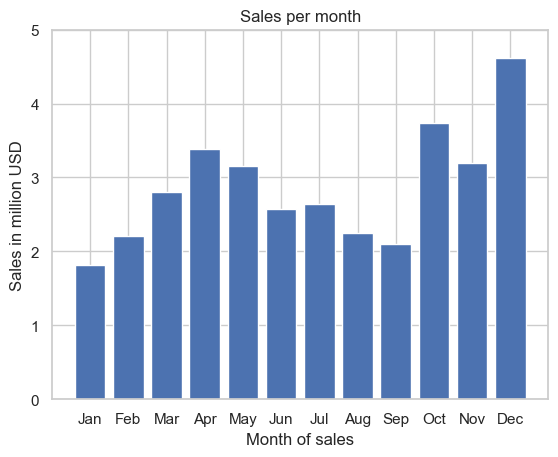

In [15]:
# Vizualizēt ieņēmumus pa mēnešiem
# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
# Seaborn is a Python data visualization library based on matplotlib.
# https://docs.python.org/3/library/calendar.html lai dabūtu abreviatūru mēnešiem
# Matplotlib krāsas: https://matplotlib.org/stable/tutorials/colors/colors.html
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Definēt mēnešu diapozonu
menesis = range(1,13)
# Sagrupēt datus pa mēnešiem un saskaitīt ieņēmumus
results = all_data.groupby("Month").sum()
# Ielikt gaišu fonu ar tumšām līnijām
sns.set_theme(style="whitegrid")
# Šis būs grafiks ar stabiņiem
plt.bar(menesis, results["Sales"])
plt.title("Sales per month")
# Ielikt diapozona cipariem mēnešu abreviatūru caur calendar
plt.xticks(menesis, calendar.month_abbr[1:13])
# plt.yticks() atgriež y ass vērtības un atrašanās vietu tālākai apstrādei
labels, location = plt.yticks()
# Noformatēt y ass iedaļu noformējumu uz miljoniem USD
plt.yticks(labels, (labels/1000000).astype(int))
plt.ylabel("Sales in million USD")
plt.xlabel("Month of sales")
# Saglabāt attēlu png formātā
plt.savefig("SalesPerMonth.png")
plt.show()

C:\Users\Liene\AppData\Local\Temp\ipykernel_5764\2850301146.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])


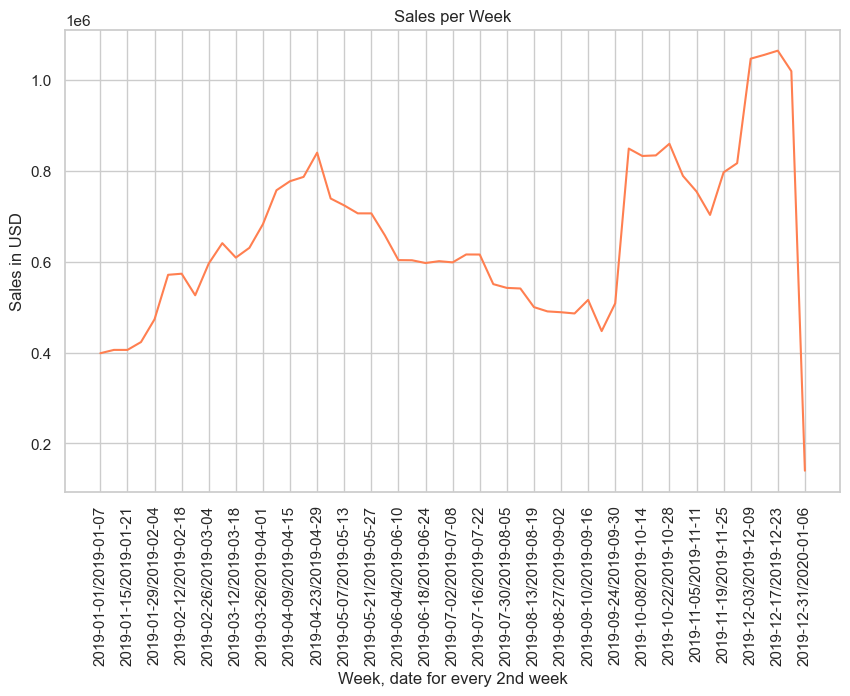

In [16]:
# Vizualizēt ieņēmumus pa nedēļām, lai būtu mazāk ierakstu - datumi katrai otrai nedēļai
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data["Week"] = all_data["Order Date"].dt.to_period("W-MON") # nedēļa sākas ar pirmdienu

# Sagrpēt dauts pa nedēļām un saskaitīt katras nedēļas ieņēmumus
weekly_sales = all_data.groupby("Week")["Sales"].sum()
# Pārveidot tipu
weekly_sales.index = weekly_sales.index.astype(str)

plt.figure(figsize=(10, 6))
# Ar šo izveido figūru ar līnijām un norāda līniju krāsu
plt.plot(weekly_sales.index, weekly_sales.values, color = "coral")
plt.xlabel("Week, date for every 2nd week")
plt.ylabel("Sales in USD")
plt.title("Sales per Week")
# X ass nosaukumi tiek norādīti katrai otrajai nedēļai
plt.xticks(weekly_sales.index[::2])
# X ass nosaukumi tiek sagriezti par 90 grādiem
plt.xticks(rotation=90)
plt.savefig("SalesPerWeek.png")
plt.show()

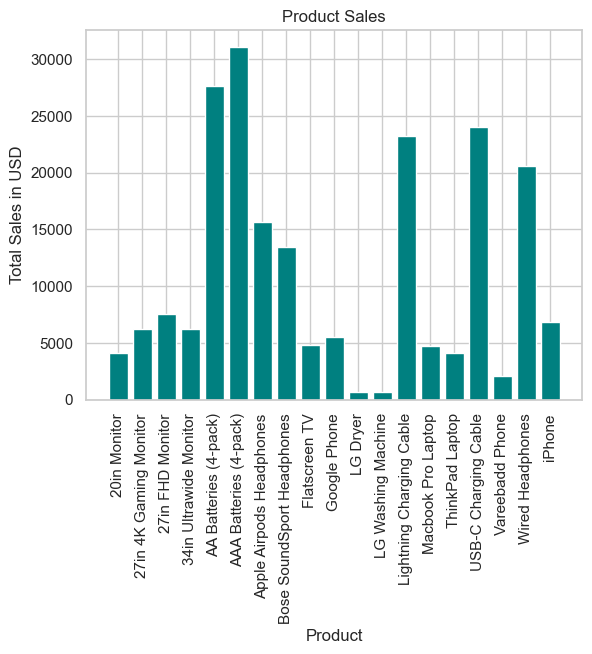

In [17]:
# Vizualizēt ieņēmumus pa produktiem
product_sales = all_data.groupby("Product")["Quantity Ordered"].sum()

plt.bar(product_sales.index, product_sales.values, color = "teal")
plt.xlabel("Product")
plt.ylabel("Total Sales in USD")
plt.title("Product Sales")
plt.xticks(rotation=90)
plt.savefig("SalesPerProduct.png")
plt.show()

C:\Users\Liene\AppData\Local\Temp\ipykernel_5764\2504842999.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_sales.index, rotation='vertical')


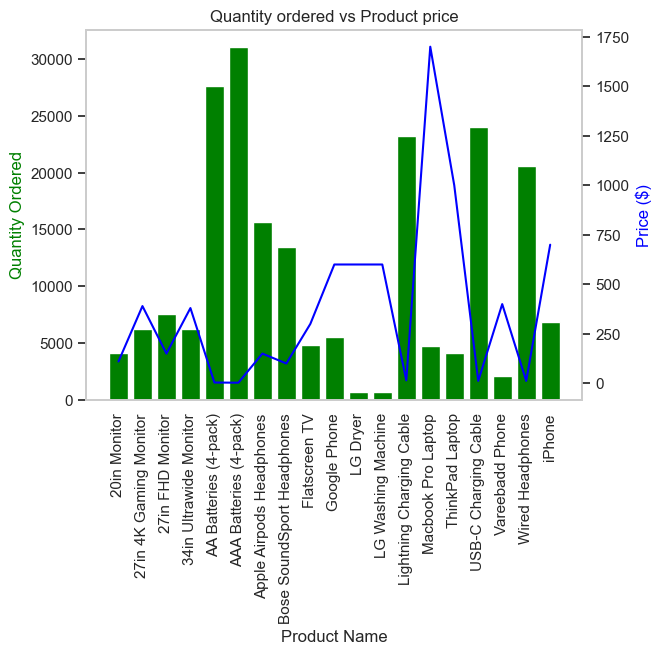

In [18]:
# Vizualizēt pārdoto produktu daudzumu pret produkta cenu
# Sagrupēt datus pa Product un sasummēt Quantity Ordered
product_sales = all_data.groupby("Product")["Quantity Ordered"].sum()
# Sagrupēt datus pa Product un Izrēķināt vidējo Price Each katram produktam
prices = all_data.groupby('Product')['Price Each'].mean()
# Izveidot jaunu figūru un asi
fig, ax1 = plt.subplots()
# Izveidot twin y asi otrai figūrai
ax2 = ax1.twinx()
# Izveidot figūru ar stabiņiem pārdotajam apjomam
ax1.bar(product_sales.index, product_sales.values, color='green')
# Izveidot otru figūru ar līniju ar cenām
ax2.plot(product_sales.index, prices.values, 'blue')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = "green")
ax2.set_ylabel('Price ($)', color='blue')
plt.title("Quantity ordered vs Product price")
ax1.set_xticklabels(product_sales.index, rotation='vertical')
# Tiek noņemts iepriekšējās figūrās izmantotais režģojums
ax1.grid(False)
ax2.grid(False)
plt.savefig("OrdereVsPrice.png")
plt.show()

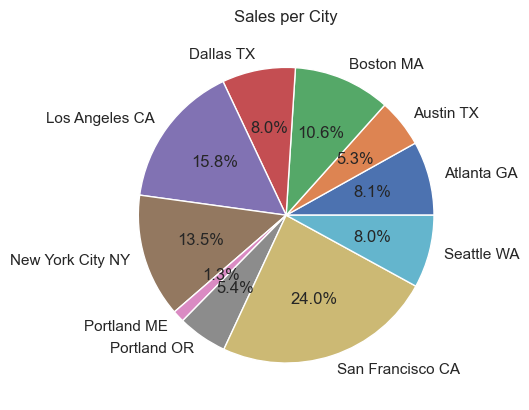

In [19]:
# Vizualizēt ieņēmumus procentuāli pa pilsētām
city_sales = all_data.groupby("City")["Sales"].sum()
# Izveidot pie chart un uzrakstīt procentus ar %1.1f%%
plt.pie(city_sales.values, labels=city_sales.index, autopct="%1.1f%%")
plt.title("Sales per City")
plt.savefig("SalesPerCityPercentage.png")
plt.show()

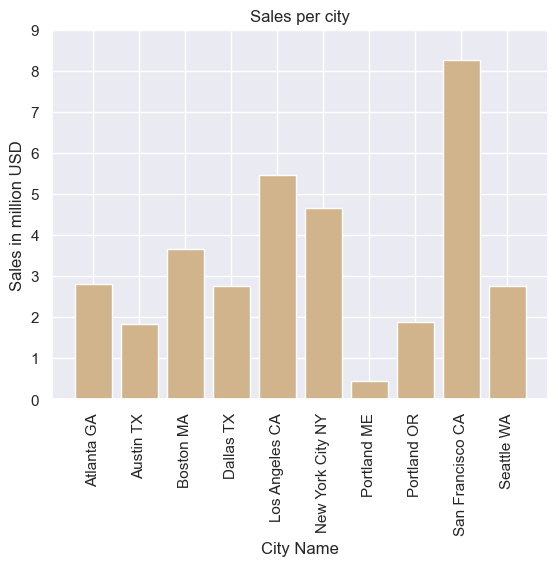

In [20]:
# Vizualizēt ieņēmumus pa pilsētām, pamēģināt bez groupby
sns.set_theme(style="darkgrid")
plt.bar(city_sales.index, city_sales.values, color="tan")
plt.title("Sales per city")
plt.xticks(rotation='vertical')
labels, location = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int)) 
plt.ylabel('Sales in million USD')
plt.xlabel('City Name')
plt.savefig("SalesPerCity.png")
plt.show()

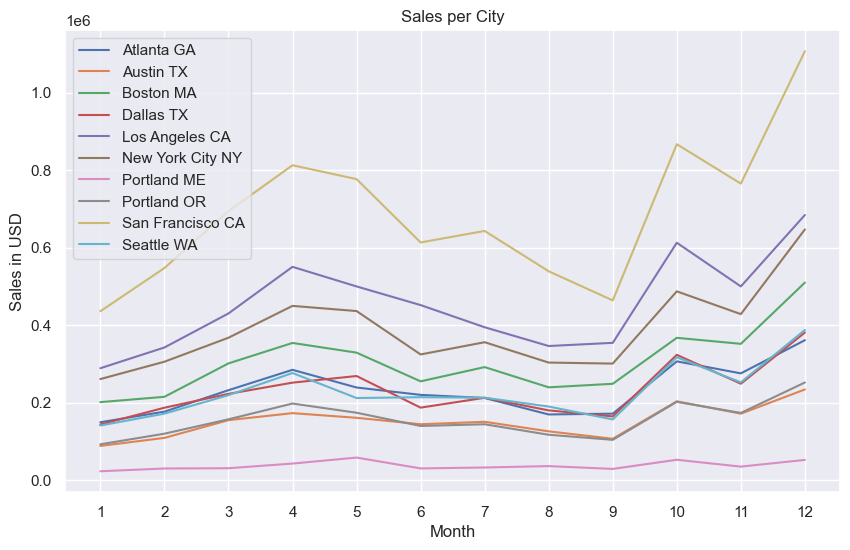

In [21]:
# Parādīt katra veikala ieņēmumus pa mēnešiem
city_monthly_sales = all_data.groupby(["City","Month"])["Sales"].sum()
# nepieciešams norādīt lielāku figūras izmēru, lai pilsētu nosaukumi nepārklājas ar līnijām
plt.figure(figsize=(10, 6))
# Iterēt pāri katrai pilsētai un tās pārdošanas datiem
for city, sales in city_monthly_sales.groupby("City"):
    # Izveidot diagrammu, ievienot label katrai pilsētai
    plt.plot(sales.index.get_level_values("Month"), sales.values, label=city)

plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Sales in USD")
plt.title("Sales per City")
plt.legend()
plt.savefig("SalesPerCityLines.png")
plt.show()

In [22]:
# Pievienot jaunu stundu kolonnu
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Week,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,2019-04-16/2019-04-22,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,2019-04-02/2019-04-08,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,2019-04-09/2019-04-15,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-09/2019-04-15,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-30/2019-05-06,9


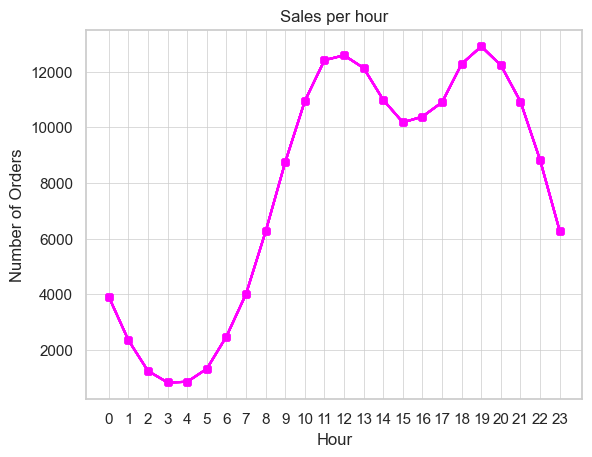

In [23]:
# Vizualizēt pārdoto pa stundām
# Izveidot unikālo stundu sarakstu iterējot pāri visām stundām un to atbilstošajam data frame
hours = [hour for hour, df in all_data.groupby("Hour")]

sns.set_theme(style="whitegrid")
plt.plot(hours, all_data.groupby(["Hour"]).count(), color="magenta", marker="s", markersize=4)
plt.title("Sales per hour")
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid(linewidth=0.5)
plt.savefig("SalesPerHour.png")
plt.show()

In [24]:
# Izveidot jaunu kolonnu ar kopā norpiktajām lietām
# Izfiltrēt rindas, kur Order ID atkārtojas; boolean ir False rindām, kurām nav duplikātu
all_data = all_data[all_data["Order ID"].duplicated(keep=False)]
# Izveidot jaunu kolonu Grouped un ar komatu apvieno Product ierakstus
all_data["Grouped"] = all_data.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
# Atmest rindiņas, kas atkārtojas... !!! vēl nedarbjojas, jo nav ņemts vērā, ka cenas ir dažādas
all_daAll_data = all_data[["Order ID", "Grouped"]].drop_duplicates()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Week,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,2019-04-09/2019-04-15,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-09/2019-04-15,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,2019-04-02/2019-04-08,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,2019-04-02/2019-04-08,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,2019-04-02/2019-04-08,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [25]:
# Apskatīt kopā vizbiežāk pirktos produktus... !!! Grouped rindiņas atkārtojas, bet output skaits ne vienmēr dalās ar 2, vēl jāsalabo ?
from itertools import combinations
from collections import Counter 
# Izveidot vietu, kur uzglabāt kombināciju skaitu
count = Counter()

for row in all_data["Grouped"]:
      # Attadlīt ar komatu
      row_list = row.split(",")
      # Atjaunināt count ar 2 elementu kombināciju no row_list
      count.update(Counter(combinations(row_list, 2)))
# Izprintēt 10 populārākās kombinācijas un to daudzumu  
for key, value in count.most_common(10):
        print(key, value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253
